# Supply Chain Delivery Status Prediction

In [1]:
##Importing packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV 
from dmba import classificationSummary
from dmba.metric import AIC_score
from dmba import backward_elimination, forward_selection, stepwise_selection
from sklearn.linear_model import LinearRegression
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from dmba import regressionSummary, exhaustive_search
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Load the data into a dataframe
data = pd.read_csv('C:/Users/burdhino/OneDrive/Desktop/ML Assignment 1/DataCoSupplyChainDataset.csv', encoding = 'unicode_escape',engine ='python')

### DATA EXPLORATION

In [3]:
##Limiting the data to 5000
data=data.head(5000)

In [4]:
##Printing the column name of the dataframe
data.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [5]:
##Printing the dimension of the dataframe
data.shape

(5000, 53)

In [6]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [7]:
#Check the data types of the columns
print(data.dtypes)

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [8]:
#To get the null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           5000 non-null   object 
 1   Days for shipping (real)       5000 non-null   int64  
 2   Days for shipment (scheduled)  5000 non-null   int64  
 3   Benefit per order              5000 non-null   float64
 4   Sales per customer             5000 non-null   float64
 5   Delivery Status                5000 non-null   object 
 6   Late_delivery_risk             5000 non-null   int64  
 7   Category Id                    5000 non-null   int64  
 8   Category Name                  5000 non-null   object 
 9   Customer City                  5000 non-null   object 
 10  Customer Country               5000 non-null   object 
 11  Customer Email                 5000 non-null   object 
 12  Customer Fname                 5000 non-null   o

In [9]:
##Creating a new dataframe df1 with selected columns
new_data = data.copy()
FeatureList=['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name',
       'Customer Country', 'Department Name','Market',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Region',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Product Price', 'Shipping Mode'
]

df1=new_data[FeatureList]
df1.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Product Price,Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,...,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,327.75,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,...,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,327.75,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,...,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,327.75,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,...,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,327.75,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,...,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,327.75,Standard Class


In [10]:
#Counting the number of Null values in the new dataframe with selected columns
df1.isnull().sum()

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Name                    0
Customer Country                 0
Department Name                  0
Market                           0
Order Item Discount              0
Order Item Discount Rate         0
Order Region                     0
Order Item Product Price         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Item Total                 0
Order Profit Per Order           0
Order Region                     0
Order State                      0
Order Status                     0
Product Price                    0
Shipping Mode                    0
dtype: int64

In [11]:
#Descriptive Statistics
df1.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.748800,3.260800,22.629060,191.951732,0.505600,22.277480,0.103764,131.927883,0.114786,2.522600,214.228868,191.951732,22.629060,131.927883
std,1.528059,1.169212,107.199729,124.494473,0.500019,23.506161,0.070295,138.422058,0.471847,1.705776,138.424152,124.494473,107.199729,138.422058
min,0.000000,0.000000,-1140.790039,9.260000,0.000000,0.000000,0.000000,11.290000,-2.750000,1.000000,11.290000,9.260000,-1140.790039,11.290000
25%,2.000000,2.000000,6.520000,103.989998,0.000000,5.600000,0.040000,50.000000,0.070000,1.000000,119.980003,103.989998,6.520000,50.000000
50%,4.000000,4.000000,31.469999,176.184998,1.000000,15.000000,0.100000,59.990002,0.270000,1.000000,199.979996,176.184998,31.469999,59.990002
75%,5.000000,4.000000,70.980003,272.029999,1.000000,32.500000,0.160000,129.990005,0.360000,4.000000,299.980011,272.029999,70.980003,129.990005
max,6.000000,4.000000,599.250000,1417.500000,1.000000,375.000000,0.250000,1500.000000,0.500000,5.000000,1500.000000,1417.500000,599.250000,1500.000000


<AxesSubplot:title={'center':'Total sales for all regions'}, xlabel='Order Region'>

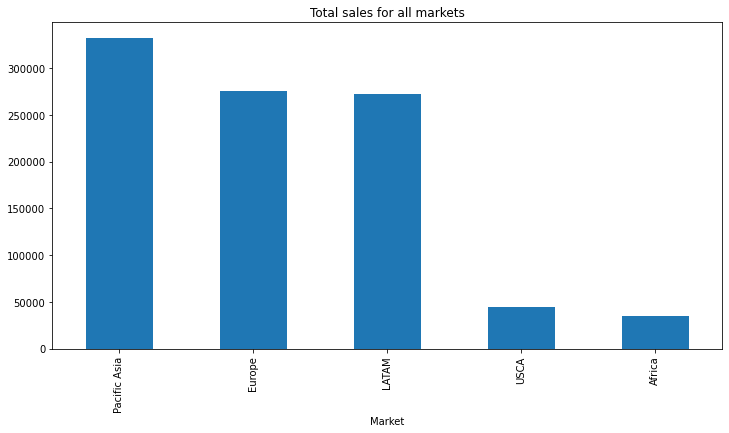

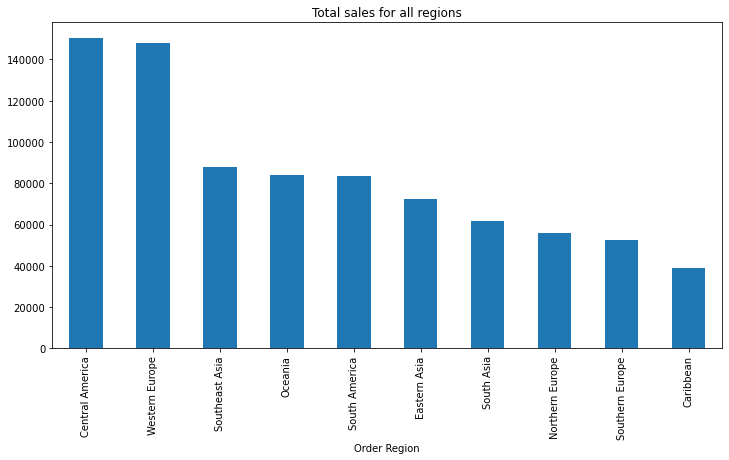

In [12]:
#Grouping by total sales with respoect to Market and Region
market = new_data.groupby('Market') 
region = new_data.groupby('Order Region')
plt.figure(1)
market['Sales per customer'].sum().sort_values(ascending=False).plot.bar(figsize=(12,6), title="Total sales for all markets")
plt.figure(2)
region['Sales per customer'].sum().sort_values(ascending=False).nlargest(10).plot.bar(figsize=(12,6), title="Total sales for all regions")

<AxesSubplot:title={'center':'Average price'}, xlabel='Category Name'>

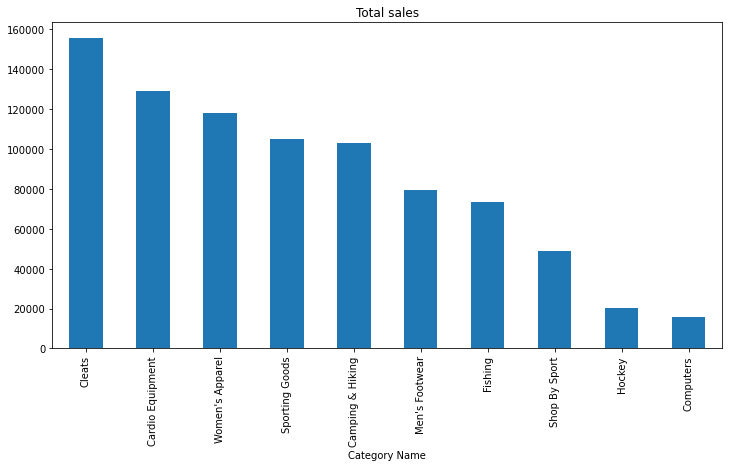

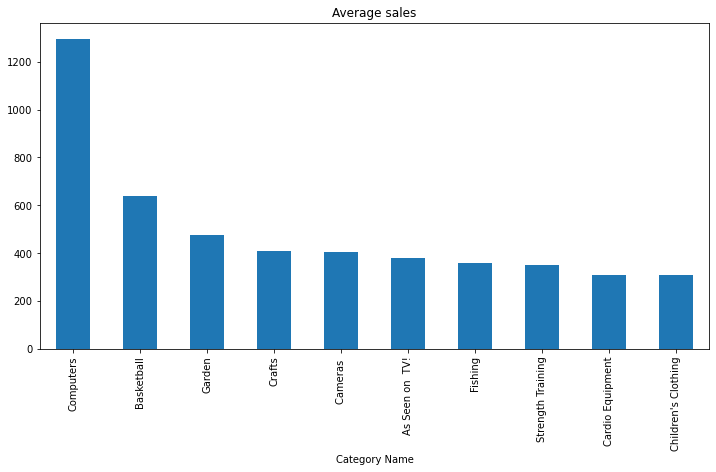

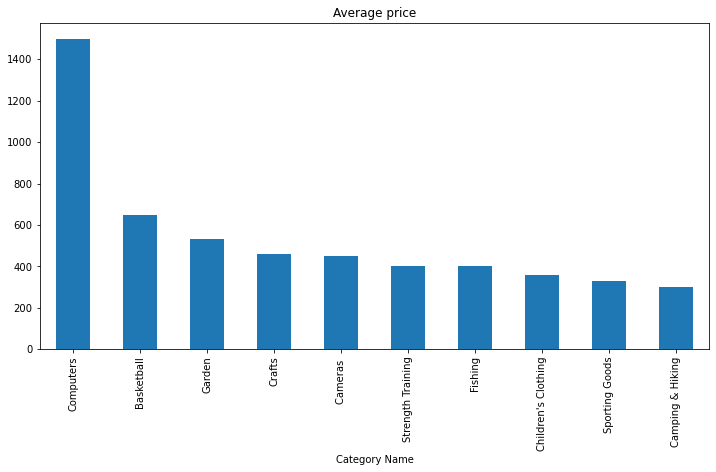

In [13]:
##Grouping all categories of product by Sales and prices
cat_df = new_data.groupby('Category Name')
plt.figure(1)
##Total sum of sales for all categories
cat_df['Sales per customer'].sum().sort_values(ascending=False).nlargest(10).plot.bar(figsize=(12,6), title="Total sales")
##Mean sales for all categories
plt.figure(2)
cat_df['Sales per customer'].mean().sort_values(ascending=False).nlargest(10).plot.bar(figsize=(12,6), title="Average sales")
plt.figure(3)
##Mean prices for all categories
cat_df['Product Price'].mean().sort_values(ascending=False).nlargest(10).plot.bar(figsize=(12,6), title="Average price")

<AxesSubplot:title={'center':'Top 10 products with most late deliveries'}>

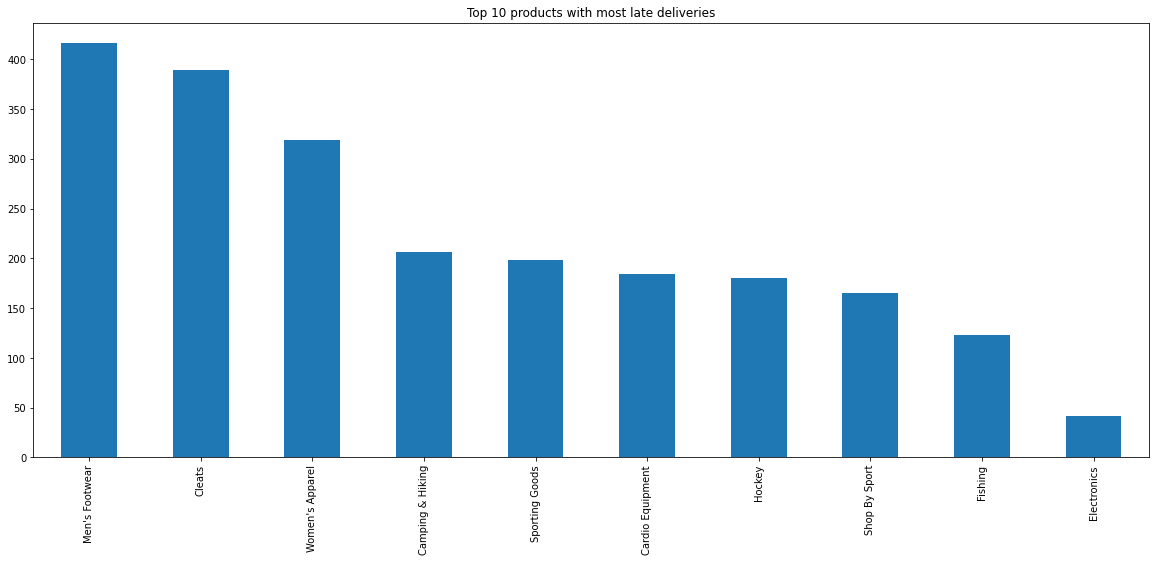

In [14]:
##Filtering columns with late delivery status
late_delivery = new_data[(data['Delivery Status'] == 'Late delivery')]
##Top 10 products with most late deliveries
late_delivery['Category Name'].value_counts().nlargest(10).plot.bar(figsize=(20,8), title="Top 10 products with most late deliveries")

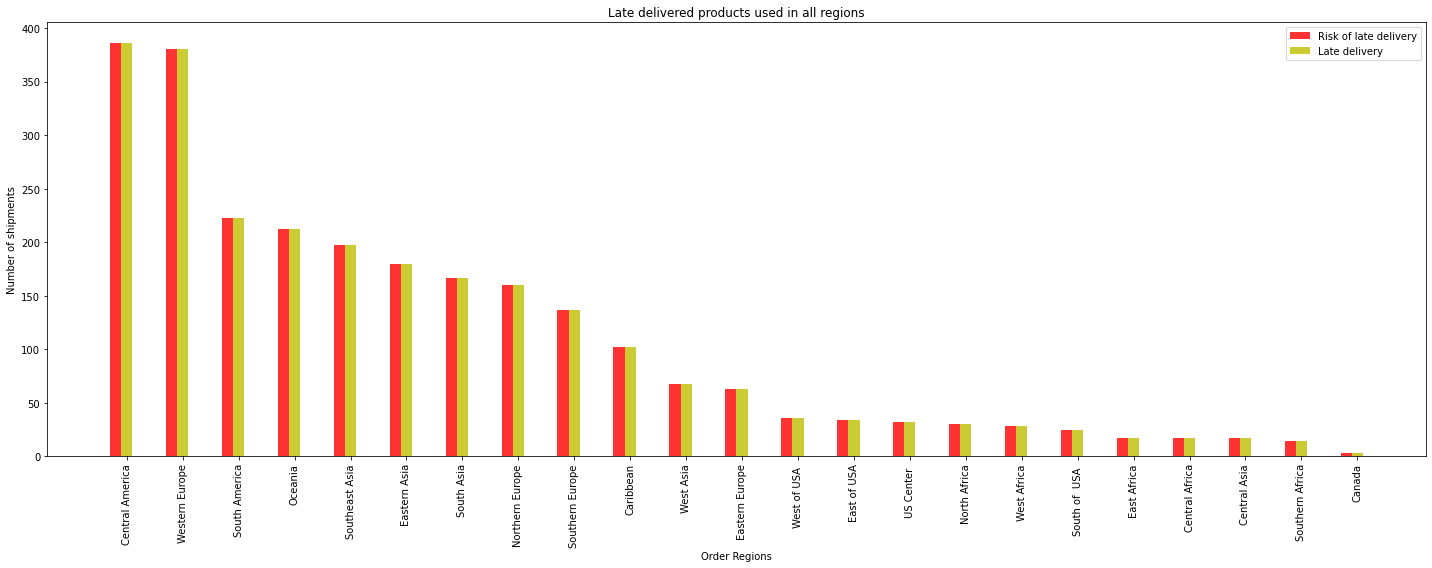

In [15]:
##Filtering orders with late delivery risk
xyz1 = new_data[(data['Late_delivery_risk'] == 1)]
##Filtering late delivered orders
xyz2 = new_data[(data['Delivery Status'] == 'Late delivery')]
count1=xyz1['Order Region'].value_counts()
count2=xyz2['Order Region'].value_counts()

names=new_data['Order Region'].value_counts().keys()
n_groups=23
fig,ax = plt.subplots(figsize=(20,8)) #Figure size
index=np.arange(n_groups)
bar_width=0.2
opacity=0.8
type1=plt.bar(index,count1,bar_width,alpha=opacity,color='r',label='Risk of late delivery')
type2=plt.bar(index+bar_width,count2,bar_width,alpha=opacity,color='y',label='Late delivery')
plt.xlabel('Order Regions')
plt.ylabel('Number of shipments')
plt.title('Late delivered products used in all regions')
plt.legend()
plt.xticks(index+bar_width,names,rotation=90)
plt.tight_layout()
plt.show()

##Neural Network (NN) Model

In [16]:
##Creating dummy variables for catergorical columns and storing it a new dataframe
categorical_columns = ["Type", "Delivery Status", "Category Name",
       "Customer Country","Market", "Department Name",
       "Order Item Quantity", "Sales", "Order Item Total", "Order Region", "Order State", "Order Status", "Shipping Mode"]

prefix = "dummy"
df2 = pd.get_dummies(df1, columns=categorical_columns, prefix=prefix, prefix_sep='_')


In [17]:
##Printing the columns of the new dataframe with the dummy variables
df2.columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Late_delivery_risk',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Profit Per Order',
       ...
       'dummy_ON_HOLD', 'dummy_PAYMENT_REVIEW', 'dummy_PENDING',
       'dummy_PENDING_PAYMENT', 'dummy_PROCESSING', 'dummy_SUSPECTED_FRAUD',
       'dummy_First Class', 'dummy_Same Day', 'dummy_Second Class',
       'dummy_Standard Class'],
      dtype='object', length=1842)

## Neural Networks Model (MLP)

In [18]:
##Splitting the data into training and test datasets
X = df2.drop(["Late_delivery_risk"], axis=1)
y = df2["Late_delivery_risk"]
classes = sorted(y.unique())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
##Train the MLP classifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

MLPClassifier()

In [20]:
##Predicting the target values for the test set
y_pred = mlp.predict(X_test)

In [21]:
clf = MLPClassifier(hidden_layer_sizes=(7),activation='logistic', solver='lbfgs',random_state=1)
clf.fit(X_train, y_train.values)
clf.predict(X)

C:\Users\Simmah Kazi\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [22]:
##Network structure
print('Intercepts')
print(clf.intercepts_)

##Script to run the weights 
print('Weights')
print(clf.coefs_)

##Predicting the probabilities of each class after using the trained model
print(pd.concat([data,pd.DataFrame(clf.predict_proba(X), columns=classes)], axis=1))

Intercepts
[array([ 0.01791197, -0.03083649,  0.02629505, -0.81827165, -0.23591476,
        2.03389164, -0.05865516]), array([23.31485151])]
Weights
[array([[ 7.69600732e-02,  6.50829305e-01, -3.99090035e-02, ...,
         6.94460860e+00, -2.13465694e+01, -2.25802741e+00],
       [ 2.04007349e-02, -6.31942564e-01, -1.06472736e-02, ...,
        -5.63484290e+00,  2.50399576e+01,  9.57690503e-01],
       [ 3.39852792e-01,  4.57504985e-01, -7.19245669e-02, ...,
        -1.37831445e+00,  3.01375964e-03,  4.30605313e-01],
       ...,
       [-1.94025928e-03,  1.29152739e-02,  9.42905311e-03, ...,
        -2.00508609e-02,  8.32041951e-02,  1.75666899e-02],
       [ 1.04929114e-03,  1.09000186e-01, -1.54925060e-02, ...,
         1.34338861e+00, -3.41451256e+00, -2.34640763e-01],
       [ 3.54119676e-02, -2.54229429e-01, -1.90556605e-02, ...,
        -2.27809010e+00,  8.84369035e+00,  4.38891403e-01]]), array([[ -1.29501841],
       [ -0.55763704],
       [  0.37107794],
       [-16.64052369],


In [23]:
##Measuring the performance of the data
print('Training Data')
classificationSummary(y_train, clf.predict(X_train))

print('\nTesting Data')
classificationSummary(y_test, clf.predict(X_test))

Training Data
Confusion Matrix (Accuracy 0.9992)

       Prediction
Actual    0    1
     0 1958    3
     1    0 2039

Testing Data
Confusion Matrix (Accuracy 0.9950)

       Prediction
Actual   0   1
     0 506   5
     1   0 489


Neural Network - Training Data - Confusion Matrix


C:\Users\Simmah Kazi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


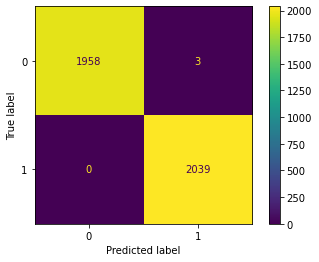

Neural Network - Test Data - Confusion Matrix


C:\Users\Simmah Kazi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


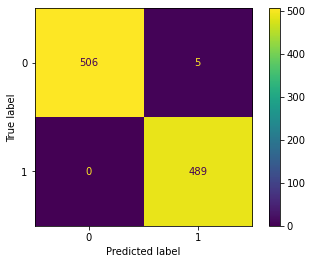

In [24]:
#Creating a Confusion matrix
print('Neural Network - Training Data - Confusion Matrix')
plot_confusion_matrix(clf, X_train, y_train)
plt.show()

print('Neural Network - Test Data - Confusion Matrix')
plot_confusion_matrix(clf, X_test, y_test)
plt.show()

### LOGISTIC REGRESSION

In [25]:
##Setting Predictors and Output variables 
Xlr = df2.drop(["Late_delivery_risk"], axis=1)
ylr = df2["Late_delivery_risk"]
Xlr_train, Xlr_test, ylr_train, ylr_test = train_test_split(Xlr, ylr, test_size=0.4, random_state=1)

In [26]:
##Logistic regression
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(Xlr_train, ylr_train)
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=Xlr.columns).transpose())

intercept  -1.1983707444236544
       Days for shipping (real)  Days for shipment (scheduled)  \
coeff                   2.81561                      -3.137995   

       Benefit per order  Sales per customer  Order Item Discount  \
coeff          -0.000198           -0.001478            -0.012956   

       Order Item Discount Rate  Order Item Product Price  \
coeff                 -0.116964                  0.000672   

       Order Item Profit Ratio  Order Profit Per Order  Product Price  ...  \
coeff                -0.160738               -0.000198       0.000672  ...   

       dummy_ON_HOLD  dummy_PAYMENT_REVIEW  dummy_PENDING  \
coeff         0.0344              0.037063       1.234752   

       dummy_PENDING_PAYMENT  dummy_PROCESSING  dummy_SUSPECTED_FRAUD  \
coeff               0.108752          1.355965              -2.537965   

       dummy_First Class  dummy_Same Day  dummy_Second Class  \
coeff           0.838352        -0.46229           -1.160691   

       dummy_Stand

In [27]:
logit_reg_pred = logit_reg.predict(Xlr_test)
logit_reg_proba = logit_reg.predict_proba(Xlr_test)
logit_result = pd.DataFrame({'actual': ylr_test, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

#Considering 3 diffrent random cases from the dataset (Samples: 90, 1, 83)
interestingCases = [90, 1, 83]
print(logit_result.loc[interestingCases])

    actual      p(0)      p(1)  predicted
90       1  0.000012  0.999988          1
1        1  0.000185  0.999815          1
83       1  0.000006  0.999994          1


In [28]:
#Measuring the performance of the data

print('Training Data ')
classificationSummary(ylr_train, logit_reg.predict(Xlr_train))

print('\nTesting Data')
classificationSummary(ylr_test, logit_reg.predict(Xlr_test))

Training Data 
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 1507    0
     1    0 1493

Testing Data
Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0  965    0
     1    0 1035


LOG REG - Training Data - Confusion Matrix


C:\Users\Simmah Kazi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


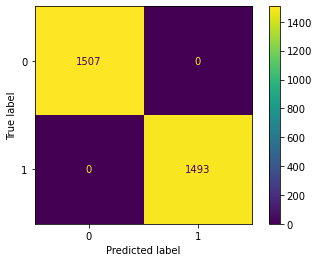

LOG REG - Test Data - Confusion Matrix


C:\Users\Simmah Kazi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


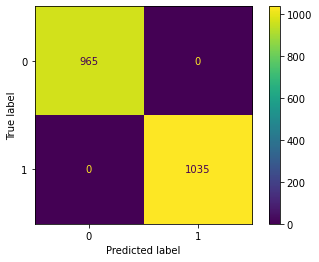

In [29]:
##Confusion Matrix
print('LOG REG - Training Data - Confusion Matrix')
plot_confusion_matrix(logit_reg, Xlr_train, ylr_train)
plt.show()

print('LOG REG - Test Data - Confusion Matrix')
plot_confusion_matrix(logit_reg, Xlr_test, ylr_test)
plt.show()